In [42]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [43]:
mydata=pd.read_csv('insurance (2).csv')

In [44]:
mydata.shape

(1338, 7)

In [9]:
#mydata.info()
#data types
mydata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
#missing values
mydata.isna().sum()
#mydata.head()
#for k in mydata:
    #A=mydata[k].isnull()
    #np.null=[]
    #for i in A:
        #if i == True:
            #np.null+=1
    #print(k,np.null)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#five point summary
df1=mydata.select_dtypes(include='float64')
df2=mydata.select_dtypes(include='int64')
df=df1.join(df2,how='outer')
#print(df)
for k in df:
    print('Attribute:',k)
    print('min:',np.min(df[k]))
    print('max:',np.max(df[k]))
    print('standard deviation:',np.std(df[k]))
    print('mean:',np.mean(df[k]))
    print('median:',np.median(df[k]))


Attribute: bmi
min: 15.96
max: 53.13
standard deviation: 6.095907641589428
mean: 30.663396860986538
median: 30.4
Attribute: charges
min: 1121.8739
max: 63770.42801
standard deviation: 12105.484975561605
mean: 13270.422265141257
median: 9382.033
Attribute: age
min: 18
max: 64
standard deviation: 14.04470903895454
mean: 39.20702541106129
median: 39.0
Attribute: children
min: 0
max: 5
standard deviation: 1.2050421724928453
mean: 1.0949177877429
median: 1.0


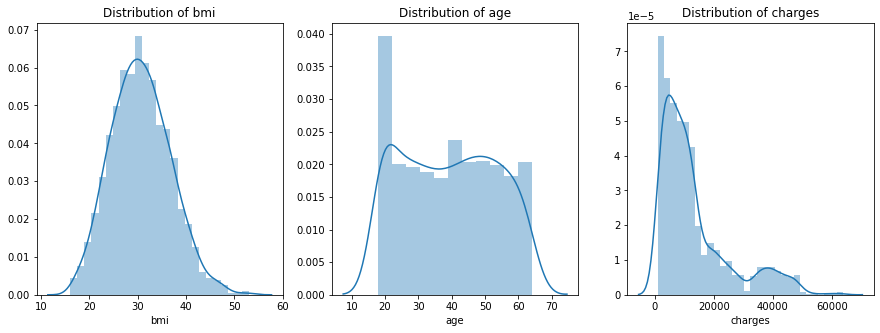

In [47]:
#distribution
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
#sns.distplot(mydata.loc[mydata.smoker == 'yes', 'charges'], ax = ax[0])
#sns.distplot(mydata.loc[mydata.smoker =='no', 'charges'], ax = ax[1])

sns.distplot(mydata['bmi'],ax=ax[0]);
sns.distplot(mydata['age'],ax=ax[1]);
sns.distplot(mydata['charges'],ax=ax[2]);
ax[0].set_title('Distribution of bmi')
ax[1].set_title('Distribution of age')
ax[2].set_title('Distribution of charges')
plt.show()

The distribution of BMI appears to be normally distributed, distribution of age is more or less flat and the distribution of charges is skewed to the left.

In [30]:
#skewness
print('skewness of bmi',mydata['bmi'].skew())
print('skewness of age',mydata['age'].skew()) 
print('skewness of charges',mydata['charges'].skew()) 

skewness of bmi 0.2840471105987448
skewness of charges 1.5158796580240388
skewness of age 0.05567251565299186


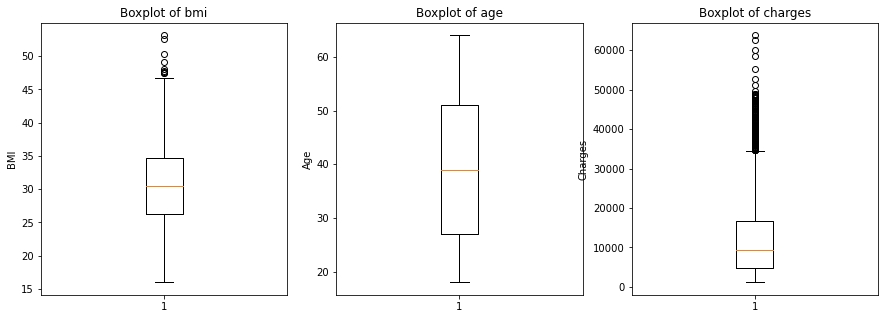

In [68]:
#outlier of distribution
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
#fig, ([ax1, ax2, ax3]) = plt.subplots(1, 3)
#ax1.boxplot(mydata['bmi'])
#ax2.boxplot(mydata['age'])
#ax3.boxplot(mydata['charges'])
#ax4.boxplot(rainfall_west)
ax[0].boxplot(mydata['bmi'])
ax[1].boxplot(mydata['age'])
ax[2].boxplot(mydata['charges'])
ax[0].set_title('Boxplot of bmi')
ax[1].set_title('Boxplot of age')
ax[2].set_title('Boxplot of charges')
#plt.title('Boxplot of BMI')
ax[0].set_ylabel("BMI")
ax[1].set_ylabel("Age")
ax[2].set_ylabel("Charges")
plt.show()

From boxplot of age, bmi and charges it can be observed that the bmi and charges has outliers.

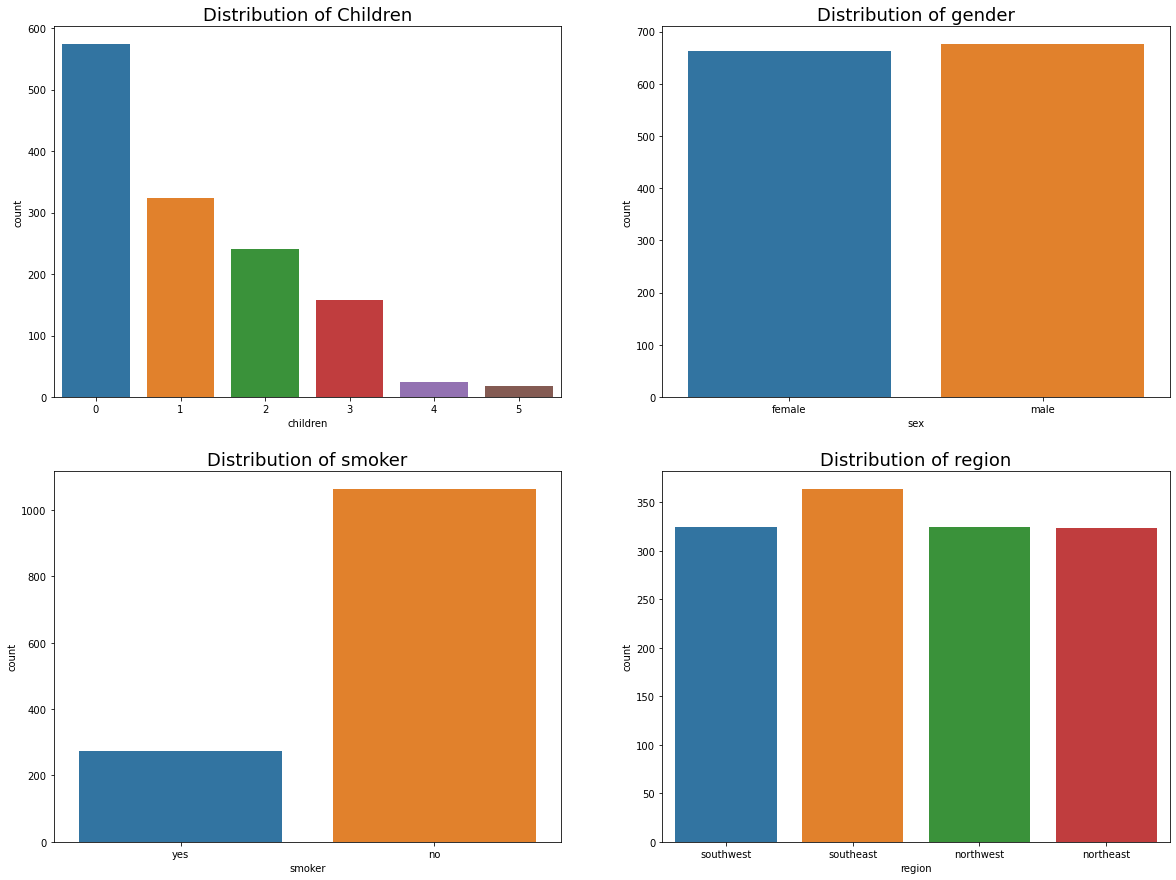

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,15))
#  subplot #1
plt.subplot(221)
plt.title('Distribution of Children', fontsize=18)
sns.countplot(data=mydata, x='children')

#  subplot #2
plt.subplot(222)
plt.title('Distribution of gender', fontsize=18)
sns.countplot(data=mydata,x='sex')

#subplot #3
plt.subplot(223)
plt.title('Distribution of smoker', fontsize=18)
sns.countplot(data=mydata,x='smoker')

#subplot #4
plt.subplot(224)
plt.title('Distribution of region', fontsize=18)
sns.countplot(data=mydata,x='region')


plt.show()

Most of the customers don't have children and the gender is mostly distributed equally, majority of them are non smokers as compared to smokers and it was observed that the southeast region had a slightly larger numbers than the rest of the people. 

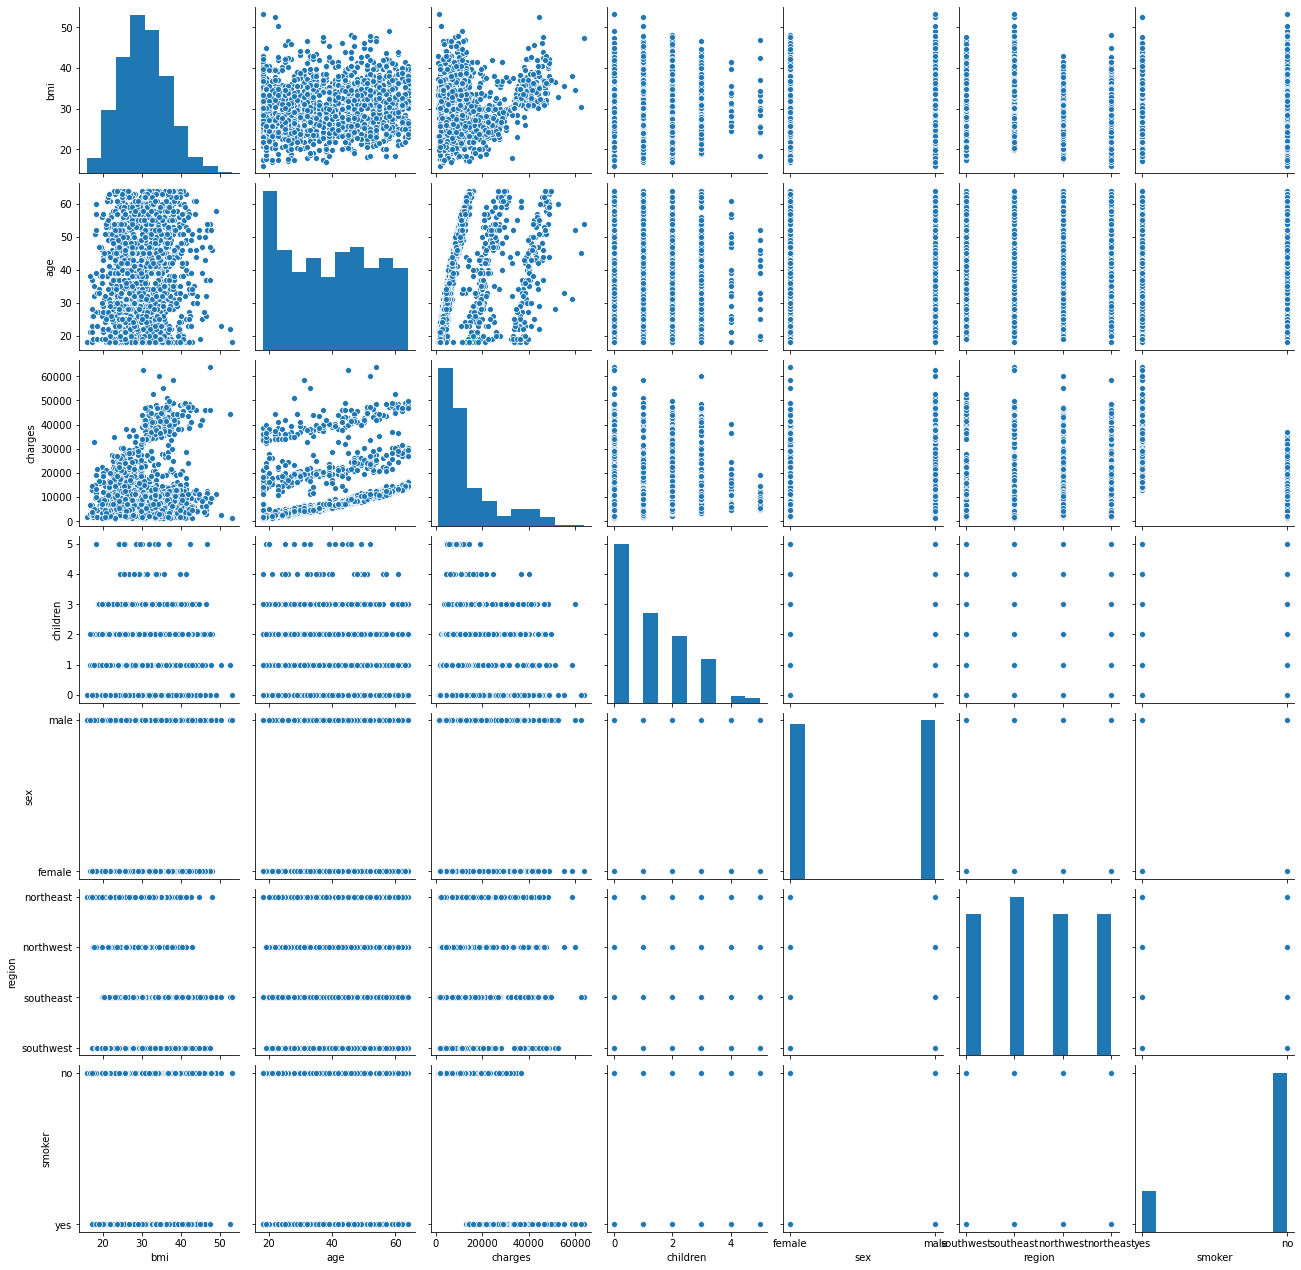

In [39]:
#pair plot
sns.pairplot(mydata, vars = ["bmi", "age", "charges","children","sex","region","smoker"], dropna = True)

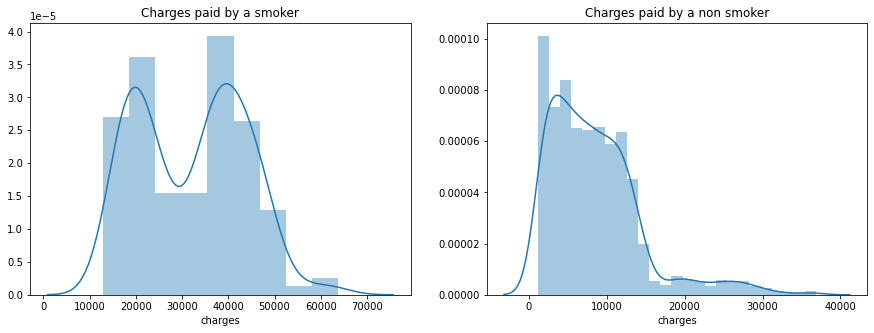

In [14]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(mydata.loc[mydata.smoker == 'yes', 'charges'], ax = ax[0])
sns.distplot(mydata.loc[mydata.smoker =='no', 'charges'], ax = ax[1])

ax[0].set_title('Charges paid by a smoker')
ax[1].set_title('Charges paid by a non smoker')
plt.show()

 To figure out the if the charges vary significantly from smokers and non smoker, initially a visual analysis is done, it can be seen from the figures above that a clear justification cannot be done through a simple distribution plot. 
Since the sample size is large a two sample test or a ztest can be performed, in this case we shall do both for verification.
A null hypothesis is used:
Ho = There is no difference between non smokers and smokers
Ha=  There is significant differnce between the charges of people who smoke doesn't differ significantly
We shall be assuming "aplha"= 5%.


In [22]:
#statistical evidence
#1 Do charges of people who smoke differ significantly from the people who don't?
from statsmodels.stats.weightstats import ztest
sample1 = mydata.loc[mydata.smoker == 'yes', 'charges']
sample2 = mydata.loc[mydata.smoker =='no', 'charges']
alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

#print( test_statistic,p_value)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')

else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

46.664921172723716 0.0
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


Thus based on null hypothesis there is a statically significant difference in the charges between a smoker and a non smoker, based on a Z test.
Now we shall do a similar null hypostheis test using a two sample test with:
Ho = There is no difference between non smokers and smokers
Ha=  There is significant differnce between the charges of people who smoke doesn't differ significantly
and "alpha"=5%

In [23]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


The p value is same as the z test, since the sample value is greater than 30. 
Thus based on null hypothesis test it can be seen that the differnce in charges for a smoker and a non smoker is stastically significant.  

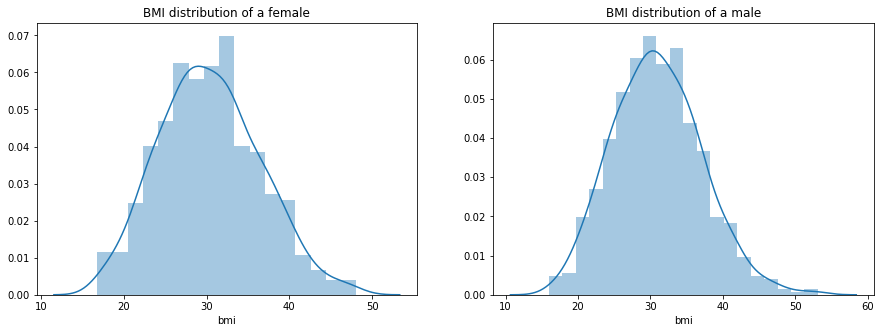

In [84]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(mydata.loc[mydata.sex == 'female', 'bmi'], ax = ax[0])
sns.distplot(mydata.loc[mydata.sex =='male', 'bmi'], ax = ax[1])

ax[0].set_title('BMI distribution of a female')
ax[1].set_title('BMI distribution of a male')
plt.show()

Visually the distribution look smilar. However, for statistical evidence ztest and two smaple test are conducted on these data sets:
NUll hypothesis = Ho = The bmi of females and male are similar
Alternate hypothesis =Ha = The bmi differ significantly

In [4]:
# Does bmi of males differ significantly from that of females?
from statsmodels.stats.weightstats import ztest
sample3 = mydata.loc[mydata.sex == 'female', 'bmi']
sample4 = mydata.loc[mydata.sex =='male', 'bmi']
alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample3, sample4)

#print( test_statistic,p_value)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')

else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

-1.6967526357522242 0.08974343679943912
	 Since the p-value, 0.09 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [5]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample3, sample4)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.09 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


From the tests there was no evidence to state that the bmi differ significatnly for male and female.

In [11]:
#Is the proportion of smokers significantly different in different genders?
mydata.sex.value_counts()
female_total = mydata.sex.value_counts()['female']
male_total=mydata.sex.value_counts()['male']
smoker_female = mydata.smoker[mydata.sex == 'female'].value_counts().loc['yes']
smoker_male = mydata.smoker[mydata.sex == 'male'].value_counts().loc['yes']
#female_proportion=female_smoker/female_total
#male_proportion=male_smoker/male_total
print(female_total,male_total,smoker_female,smoker_male)
#sample6=sample3 = mydata.loc[mydata.sex == 'male', 'smoker']

662 676 115 159


The proportion of female smokers to male smokers were calculated in the above cell. Since the sample size were larger than 30 z test was carried out to find out the significance.
NUll hypothesis = Ho = The proportion is similar in both the genders
Alternate hypothesis =Ha = The proportion is different for both the genders


In [12]:
#Is the proportion of smokers significantly different in different genders?
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([smoker_female, smoker_male], [female_total, male_total])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.005 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


From the test above it can be observed that the proportion is different for both the genders. 

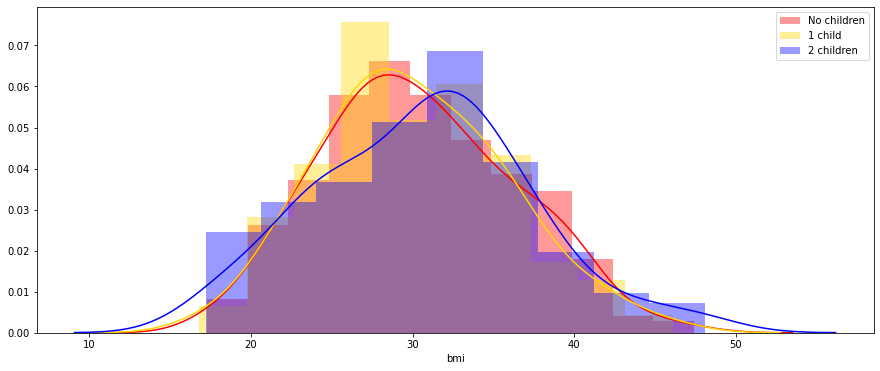

In [40]:
#Is the distribution of bmi across women with no children, one child and two children, the same?
sample5 = mydata.loc[mydata.sex == 'female'].loc[mydata.children==0,'bmi']
sample6 = mydata.loc[mydata.sex == 'female'].loc[mydata.children==1,'bmi']
sample7 = mydata.loc[mydata.sex == 'female'].loc[mydata.children==2,'bmi']
plt.figure(figsize=(15,6))
sns.distplot(sample5, color = 'Red', label = 'No children')
sns.distplot(sample6, color = 'Gold', label = '1 child')
sns.distplot(sample7, color = 'blue', label = '2 children')
plt.legend()
plt.show()

#print(sample5,sample6,sample7)

Visually all the three distributions look alike, however, further statistical evidence is neccessary. An ANOVA test is conducted to verify the problem statement.
Null hypothesis: bmi across all three cases are same
Alternate hypothesis: bmi across all three cases are different.

In [41]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(sample5, sample6, sample7)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.716 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


The distribution of bmi is same and they dont differ significantly. 